<a href="https://colab.research.google.com/github/A1ienSword/Pattern-recognition-labs/blob/main/%D0%9B%D0%B0%D0%B1%D0%BE%D1%80%D0%B0%D1%82%D0%BE%D1%80%D0%BD%D0%B0%D1%8F_%D1%80%D0%B0%D0%B1%D0%BE%D1%82%D0%B0_4_%D0%9A%D0%BE%D1%81%D1%82%D0%B8%D1%86%D1%8B%D0%BD_%D0%92%D0%92_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Лабораторная работа №4. Метод максимина.
1. Написать программу, реализующую кластеризацию объектов, заданных признаковым
описанием, с использованием метода максимина.
2. Продемонстрировать работу программы на подготовленном наборе данных.
3. Функция, реализующая алгоритм максимина, должна быть реализована студентом
самостоятельно. Допускается использование готовых примитивов из стандартных
или сторонних библиотек для выполнения базовых (в т.ч. векторизованных) операций
(сложение, умножение, возведение в степень, вычисление среднего значения и т.п.).
4. Требования к набору данных: не менее 30 объектов, не менее 2 и не более 5 классов,
не менее 3 и не более 7 атрибутов у объекта. Можно взять предложенные наборы
данных «Ирисы» либо «Фрукты и овощи».
5. При выполнении задания рекомендуется использовать язык программирования Python
или среду Octave

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import pairwise_distances

In [2]:
# Загрузка данных
data = pd.read_csv('iris.csv.gz')

In [3]:
# Разделение данных на признаки (X) и метки классов (y)
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

In [4]:
# Нормализация данных
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [12]:
def maximin_cluster(X, max_clusters=3):
    """
    Реализация алгоритма максимина.

    Параметры:
    X - нормализованные данные
    max_clusters - максимальное количество кластеров
    """
    # Шаг 1: Инициализация первого кластера
    centers = [X[0]]

    # Шаг 2: Поиск самой удаленной точки от первого центра
    distances = np.linalg.norm(X - centers[0], axis=1)
    second_center = X[np.argmax(distances)]
    centers.append(second_center)

    # Шаг 3: Итеративное добавление новых центров
    while len(centers) < max_clusters:
        # Вычисление расстояний до ближайших центров
        dist_to_centers = pairwise_distances(X, np.array(centers))
        min_dists = np.min(dist_to_centers, axis=1)
        candidate_idx = np.argmax(min_dists)
        candidate_dist = min_dists[candidate_idx]

        # Проверка условия добавления нового центра
        max_center_dist = np.max(pairwise_distances(np.array(centers)))
        if candidate_dist > 0.5 * max_center_dist:
            centers.append(X[candidate_idx])
        else:
            break

    return np.array(centers)


In [13]:
# Применение алгоритма
centers = maximin_cluster(X_scaled)
print(f"Найдено кластеров: {len(centers)}")

Найдено кластеров: 3


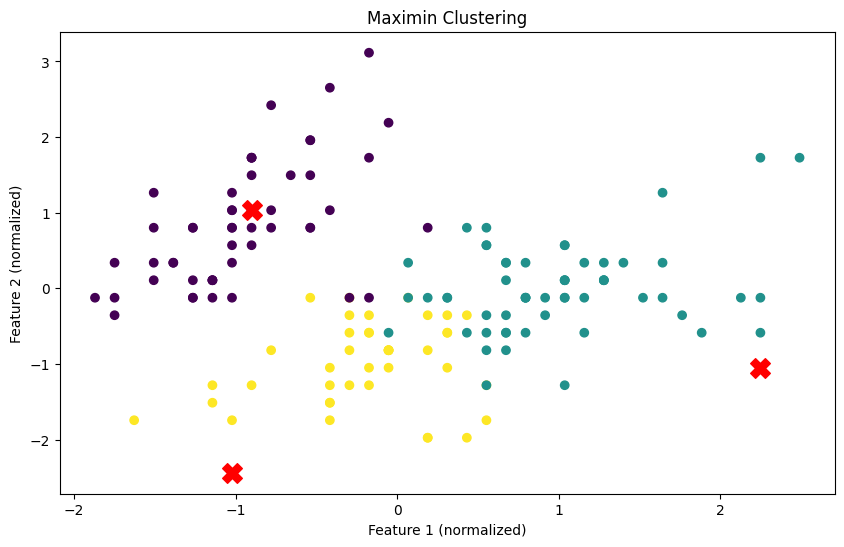

In [14]:
# Назначение точек кластерам
dist_matrix = pairwise_distances(X_scaled, centers)
cluster_labels = np.argmin(dist_matrix, axis=1)

# Визуализация (для первых двух признаков)
plt.figure(figsize=(10, 6))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=cluster_labels, cmap='viridis')
plt.scatter(centers[:, 0], centers[:, 1], s=200, marker='X', c='red')
plt.title('Maximin Clustering')
plt.xlabel('Feature 1 (normalized)')
plt.ylabel('Feature 2 (normalized)')
plt.show()